# Lista 1 - Paulo Vitor Correia de Oliveira

#### Problema 1

Indique graficamente se cada um dos programas lineares a seguir tem uma solução viável. Determine graficamente a solução ótima, se existir, ou prove que não existe nenhuma.

a) Maximize $z = x_1 + 2x_2$ sob:
- $x_1 - 2x_2 \leq 3$
- $x_1 + x_2 \leq 3$
- $x_1 \geq 0$
- $x_2 \geq 0$

In [24]:
# Importações Relevantes
import numpy as np
import matplotlib.pyplot as plt
import pulp as pl

Para esse problema, faremos uma função que utiliza a biblioteca MatPlotLib para gerar os gráficos especificados.

In [25]:
# Função que desenha o gráfico dada a região
def graph(x1,x1_l,x2,x2_l,f,f_l,R):
    fig,axe = plt.subplots()
    values_masked = np.where(R, f, np.nan)
    img = axe.imshow(values_masked, cmap="viridis", extent=(x1.min(), x1.max(), x2.min(), x2.max()), origin="lower")
    fig.colorbar(img, ax=axe, label=f_l)
    plt.xlabel(x1_l); plt.ylabel(x2_l)
    return fig,axe

# Obtém o espaço adequado para variáveis dentro de algum limite
def getspace(a,b,inc=1,ay="0",by="0"):
    if ay == "0":
        ay = a
    if by == "0":
        by = b
    return np.linspace(a,b,750), np.linspace(ay,by,750), np.linspace(a-inc,b+inc,750), np.linspace(ay-inc,by+inc,750)

E com essas funções, mostraremos a região desejada. Note que foi feito um gradiente com a cor, e portanto, conseguimos notar visualmente onde se localiza a solução esperada.

[]

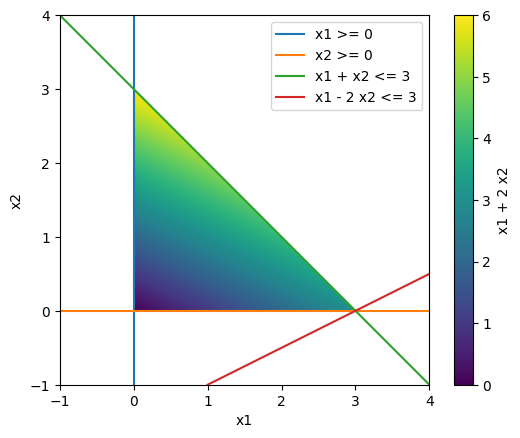

In [26]:
x1,x2,x1_,x2_ = getspace(0,3)
X1,X2 = np.meshgrid(x1,x2)
R = (X1 >= 0) & (X2 >= 0) & (X1 - 2*X2 <= 3) & (X1 + X2 <= 3)
fig,axe = graph(x1,"x1",x2,"x2",X1+2*X2,"x1 + 2 x2",R)

axe.plot([0]*750,x2_,label="x1 >= 0")
axe.plot(x1_,[0]*750,label="x2 >= 0")
axe.plot(x1_,3-x1_,label="x1 + x2 <= 3")
axe.plot(3+2*x2_,x2_,label="x1 - 2 x2 <= 3")
axe.set_xlim(x1_.min(), x1_.max())
axe.set_ylim(x2_.min(), x2_.max())

plt.legend()
plt.plot()

Com o desenho acima e conhecimento sobre funções lineares, podemos ver que o máximo ocorre no vértice (0,3), obtendo valor 6. Podemos também criar um programa linear usando o PuLP e obter o valor ótimo da solução.

In [27]:
# Definição do Problema
p1 = pl.LpProblem("I",pl.LpMaximize)

# Definição das Variáveis + Positividade
x1 = pl.LpVariable("x1",lowBound=0)
x2 = pl.LpVariable("x2",lowBound=0)

# Definição do Objetivo
p1 += (x1 + 2*x2)

# Definição das Restrições
p1 += (x1 - 2*x2 <= 3)
p1 += (x1 + x2 <= 3)

#Solve: Usando solver padrão sem comentários automáticos
p1.solve(pl.PULP_CBC_CMD(msg=False))
print(f'Problema {p1.name} otimizado. Status: {f"Solução Ótima = {p1.objective.value()}. Variáveis: (x1 = {x1.varValue}, x2 = {x2.varValue})." if p1.status == 1 else "Solução Não Encontrada."}')

Problema I otimizado. Status: Solução Ótima = 6.0. Variáveis: (x1 = 0.0, x2 = 3.0).


E com isso, vemos que os dois resultados são equivalentes, como esperaríamos.

b) Minimize $z = x_1 + x_2$ sob:
- $x_1 - x_2 \leq 2$
- $x_2 - x_2 \geq -2$
- $x_1 \geq 0$
- $x_2 \geq 0$

Primeiro, geramos o código para o gráfico:

[]

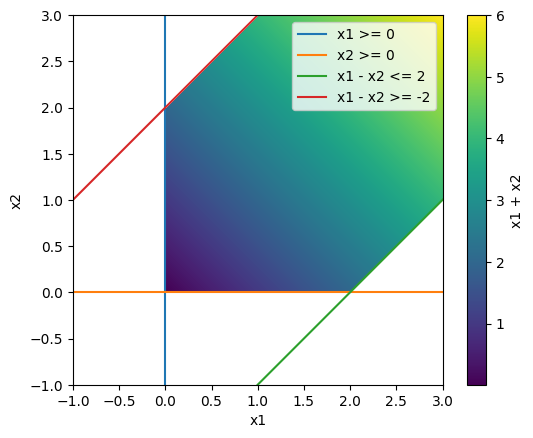

In [28]:
x1,x2,x1_,x2_ = getspace(0,2,inc=1)
X1,X2 = np.meshgrid(x1_,x2_)
R = (X1 >= 0) & (X2 >= 0) & (X1 - X2 <= 2) & (X1 - X2 >= -2)
fig,axe = graph(x1_,"x1",x2_,"x2",X1+X2,"x1 + x2",R)

axe.plot([0]*750,x2_,label="x1 >= 0")
axe.plot(x1_,[0]*750,label="x2 >= 0")
axe.plot(2+x2_,x2_,label="x1 - x2 <= 2")
axe.plot(-2+x2_,x2_,label="x1 - x2 >= -2")
axe.set_xlim(x1_.min(), x1_.max())
axe.set_ylim(x2_.min(), x2_.max())

plt.legend()
plt.plot()

Nesse exemplo, podemos ver que o valor mínimo está no vértice inferior esquerdo (0,0), com valor 0. Agora, confirmaremos isso pelo PuLP:

In [29]:
p = pl.LpProblem("II",pl.LpMinimize)

x1 = pl.LpVariable("x1",lowBound=0)
x2 = pl.LpVariable("x2",lowBound=0)

p += (x1 + x2)

p += (x1 - x2 <= 2)
p += (x1 - x2 >= -2)

p.solve(pl.PULP_CBC_CMD(msg=False))
print(f'Problema {p.name} otimizado. Status: {f"Solução Ótima = {p.objective.value()}. Variáveis: (x1 = {x1.varValue}, x2 = {x2.varValue})." if p.status == 1 else "Solução Não Encontrada."}')

Problema II otimizado. Status: Solução Ótima = 0.0. Variáveis: (x1 = 0.0, x2 = 0.0).


c) Refaça (b) Com a seguinte função objetivo: Maximize $z = x_1 + x_2$

Nesse caso, teríamos o mesmo gráfico acima, mas veja que ele vai se estender infinitamente, então não há um valor máximo dadas essas restrições: podemos obter $x_1 + x_2$ tão grande quanto quisermos.

In [30]:
p = pl.LpProblem("III",pl.LpMaximize)

x1 = pl.LpVariable("x1",lowBound=0)
x2 = pl.LpVariable("x2",lowBound=0)

p += (x1 + x2)

p += (x1 - x2 <= 2)
p += (x1 - x2 >= -2)

p.solve(pl.PULP_CBC_CMD(msg=False))
print(f'Problema {p.name} otimizado. Status: {f"Solução Ótima = {p.objective.value()}. Variáveis: (x1 = {x1.varValue}, x2 = {x2.varValue})." if p.status == 1 else "Solução Não Encontrada."}')

Problema III otimizado. Status: Solução Não Encontrada.


d) Maximize $z = 3x_1 + 4x_2$ sob:
- $x_1 − 2x_2 \geq 4$
- $x_1 + x_2 \leq 3$
- $x_1 \geq 0$
- $x_2 \geq 0$

Faremos o mesmo processo de antes.

[]

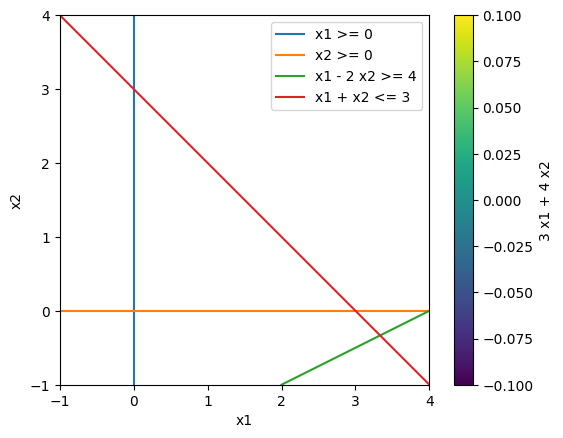

In [31]:
x1,x2,x1_,x2_ = getspace(0,3)
X1,X2 = np.meshgrid(x1,x2)
R = (X1 >= 0) & (X2 >= 0) & (X1 - 2*X2 >= 4) & (X1 + X2 <= 3)
fig,axe = graph(x1,"x1",x2,"x2",3*X1+4*X2,"3 x1 + 4 x2",R)

axe.plot([0]*750,x2_,label="x1 >= 0")
axe.plot(x1_,[0]*750,label="x2 >= 0")
axe.plot(4+2*x2_,x2_,label="x1 - 2 x2 >= 4")
axe.plot(x1_,3-x1_,label="x1 + x2 <= 3")
axe.set_xlim(x1_.min(), x1_.max())
axe.set_ylim(x2_.min(), x2_.max())

plt.legend()
plt.plot()

Veja que pelos lados das desigualdades, a região tem que estar tanto dentro do triângulo das retas vermelha, azul e amarela quanto abaixo da linha verde, que é geometricamente impossível. Por isso, não há solução viável e muito menos ótima.

In [32]:
p = pl.LpProblem("IV",pl.LpMaximize)

x1 = pl.LpVariable("x1",lowBound=0)
x2 = pl.LpVariable("x2",lowBound=0)

p += (3*x1 + 4*x2)

p += (x1 - 2*x2 >= 4)
p += (x1 + x2 <= 3)

p.solve(pl.PULP_CBC_CMD(msg=False))
print(f'Problema {p.name} otimizado. Status: {f"Solução Ótima = {p.objective.value()}. Variáveis: (x1 = {x1.varValue}, x2 = {x2.varValue})." if p.status == 1 else "Solução Não Encontrada."}')

Problema IV otimizado. Status: Solução Não Encontrada.


#### Problema 2

Considere o seguinte programa linear:

- Maximize $z = 2x_1 + x_2$

sob:

- $12x_1 + 3x_2 \leq 6$
- $-3x_1 + x_2 \leq 7$
- $x_2 \leq 10$
- $x_1 \geq 0$
- $x_2 \geq 0$

a) Esboce um gráfico da região viável com as restrições e destaque a região viável. Dê um nome para os vértices, deixando claro quais as suas coordenadas.


Vamos desenhar o gráfico como pedido.

[]

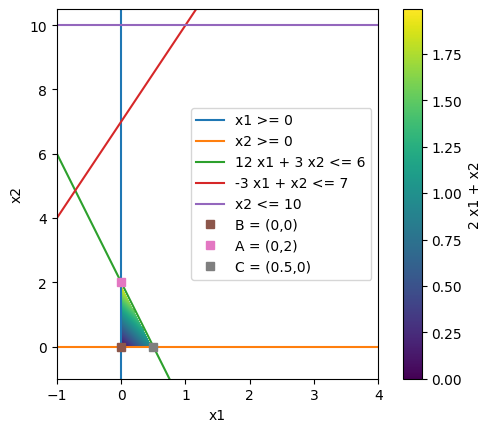

In [33]:
x1,x2,x1_,x2_ = getspace(0,3,1,0,9.5)
X1,X2 = np.meshgrid(x1,x2)
R = (X1 >= 0) & (X2 >= 0) & (12*X1 + 3*X2 <= 6) & (-3*X1 + X2 <= 7) & (X2 <= 10)
fig,axe = graph(x1,"x1",x2,"x2",2*X1+X2,"2 x1 + x2",R)

axe.plot([0]*750,x2_,label="x1 >= 0")
axe.plot(x1_,[0]*750,label="x2 >= 0")
axe.plot(x1_,-4*x1_+2,label="12 x1 + 3 x2 <= 6")
axe.plot(x1_,7+3*x1_,label="-3 x1 + x2 <= 7")
axe.plot(x1_,[10]*750,label="x2 <= 10")
axe.plot(0,0,"s",label="B = (0,0)")
axe.plot(0,2,"s",label="A = (0,2)")
axe.plot(0.5,0,"s",label="C = (0.5,0)")
axe.set_xlim(x1_.min(), x1_.max())
axe.set_ylim(x2_.min(), x2_.max())
plt.gca().set_aspect(0.5)

plt.legend()
plt.plot()

b) Usando o gráfico de (a), encontre a solução ótima e o valor máximo da função objetivo.

A solução ótima está em um dos vértices. $f(A) = 2\cdot0+2 = 2$; $f(B) = 2\cdot0+0 = 0$, $f(C) = 2\cdot0.5+0 = 1$. Entre eles, o vértice ótimo é A, que tem valor 2. Como nenhum outro vértice tem valor ótimo, não há face ótima. Nesse caso, o valor máximo da função objetivo é 2. 

c) Qual a folga de cada restrição?

Podemos calcular as folgas com:

Slack($12x_1 + 3x_2 \leq 6$) = 6-6 = 0 (restrição ativa).

Slack($-3x_1 + x_2 \leq 7$) = 7-2 = 5 (restrição inativa).

Slack($x_2 \leq 10$) = 10-2 = 8 (restrição inativa). 

Segue abaixo um código que calcula computacinalmente a folga das restrições usando PuLP:

In [34]:
prob = pl.LpProblem("V", pl.LpMaximize)

x1 = pl.LpVariable("x1", lowBound=0)
x2 = pl.LpVariable("x2", lowBound=0)

prob += (2*x1 + x2, "Z")

prob += (12*x1 + 3*x2 <= 6, "R1")
prob += (-3*x1 + x2 <= 7, "R2")
prob += (x2 <= 10, "R3")

prob.solve(pl.PULP_CBC_CMD(msg=False))

for name, constraint in prob.constraints.items():
    print(f"{name} slack =", constraint.slack)

R1 slack = -0.0
R2 slack = 5.0
R3 slack = 8.0


d) Encontre os preços sombra de cada restrição.

Para calcular os preços sombra, temos que para cada restrição, considerar o que ocorre ao aumentarmos o lado direito da equação em uma unidade no contexto da solução ótima.

Veja que $R_2$ e $R_3$ estão inativas, então possuem shadow price 0. Calcularemos apenas o de $R_1$. Veja que ao aumentarmos 6 para 7, o formato continua triangular, e com isso, o vértice ótimo continua o vértice superior do triângulo, mas agora ele tem valor $2 + \frac{1}{3}$ no eixo $x$, e como o coeficiente é 1, o shadow price é $\frac{1}{3}$.

O código abaixo calcula os preços sombra das restrições, que podem ser acessados por $.pi$ no PuLP:

In [35]:
for name, constraint in prob.constraints.items():
    print(f"{name} shadow price =", constraint.pi)

R1 shadow price = 0.33333333
R2 shadow price = -0.0
R3 shadow price = -0.0


e) Encontre os intervalos associados aos dois coeficientes da função objetivo.

Veja que para toda função objetivo $f$, $f(B)=0$. Assim, para o ponto atual $A$ ser melhor que $B$, basta o coeficiente de $x_1$ ser não negativo, pois assim o valor de $f(A)$ também é, o tornando ótimo em relação a $B$. Para vencer $C$, precisamos que $c_{x_2} \cdot 2 \geq c_{x_1} \cdot 0.5$, que infere $c_{x_1} \leq 4 \cdot c_{x_2}$. Para isso ser válido com $c_{x_1}=2$, teremos $c_{x_2} \in [0.5, +\infty)$, e para ser válido com $c_{x_2}=1$, teremos $c_{x_1} \in [0,4]$

Assim, nossos intervalos são $I_{x_1} = [0.5, +\infty), I_{x_2} = [0,4]$.

Para fazer isso em Python, usaremos uma biblioteca chamada Gurobipy, já que o PuLP não consegue fazer por si só.

In [36]:
import gurobipy as gp

# Reescrevendo o modelo
model = gp.Model("sensibility_analysis")
model.Params.LogToConsole = 0
x1 = model.addVar(lb=0, name="x1")
x2 = model.addVar(lb=0, name="x2")
model.setObjective(2*x1 + x2, gp.GRB.MAXIMIZE)
constr1 = model.addConstr(12*x1 + 3*x2 <= 6, "c1")
constr2 = model.addConstr(-3*x1 + x2 <= 7, "c2")
constr3 = model.addConstr(x2 <= 10, "c3")
model.optimize()

# Imprime os valores desejados dentro da optimalidade
if model.status == gp.GRB.OPTIMAL:
    print("Intervalos para coeficientes da função objetivo")
    print("Para x1:")
    print(f"  Coeficiente atual: {x1.obj}")
    print(f"  Intervalo: [{x1.SAObjLow}, {x1.SAObjUp}]")
    print("Para x2:")
    print(f"  Coeficiente atual: {x2.obj}")
    print(f"  Intervalo: [{x2.SAObjLow}, {x2.SAObjUp}]")

Set parameter LogToConsole to value 0
Intervalos para coeficientes da função objetivo
Para x1:
  Coeficiente atual: 2.0
  Intervalo: [-inf, 4.0]
Para x2:
  Coeficiente atual: 1.0
  Intervalo: [0.5, inf]


Veja que estamos parcialmente certos, mas a única diferença foi que o Gurobipy não considerou a não negatividade da variável, e se isso fosse feito, teríamos os mesmos intervalos, como queríamos obter.

f) Encontre os intervalos para o lado direito de cada uma das restrições.

Em resumo, queremos encontrar quais valores para cada lado direito de modo que todas as variáveis mantenham seu estado (nula vs não nula) e as mesmas restrições continuem ativas. Novamente, podemos usar o Gurobipy para obter esses intervalos.

In [37]:
print("Intervalos para os Lados Direitos")
print("Para restrição 1 (12x1 + 3x2 ≤ 6):")
print(f"  RHS atual: {constr1.rhs}")
print(f"  Limite inferior: {constr1.SARHSLow}")
print(f"  Limite superior: {constr1.SARHSUp}")
print("Para restrição 2 (-3x1 + x2 ≤ 7):")
print(f"  RHS atual: {constr2.rhs}")
print(f"  Limite inferior: {constr2.SARHSLow}")
print(f"  Limite superior: {constr2.SARHSUp}")
print("Para restrição 3 (x2 ≤ 10):")
print(f"  RHS atual: {constr3.rhs}")
print(f"  Limite inferior: {constr3.SARHSLow}")
print(f"  Limite superior: {constr3.SARHSUp}")

Intervalos para os Lados Direitos
Para restrição 1 (12x1 + 3x2 ≤ 6):
  RHS atual: 6.0
  Limite inferior: 0.0
  Limite superior: 21.0
Para restrição 2 (-3x1 + x2 ≤ 7):
  RHS atual: 7.0
  Limite inferior: 2.0
  Limite superior: inf
Para restrição 3 (x2 ≤ 10):
  RHS atual: 10.0
  Limite inferior: 2.0
  Limite superior: inf


#### Problema 3

Considere o problema de carteira de investimentos (bond-portifolio) da seção 1.3 e reformule o problema restringindo os ativos disponíveis apenas para os ativos A e D. Adicione ainda uma restrição que force o valor mínimo de ativos municipais na sua posse para 3 milhões.

a) Qual a solução ótima?

Basta modelarmos o problema usando PuLP e usar um solver.

In [ ]:
p = pl.LpProblem("VI",pl.LpMaximize)

a = pl.LpVariable("a", lowBound = 0)
d = pl.LpVariable("d", lowBound = 0)
y = pl.LpVariable("y", lowBound = 0)

p += (0.043*a + 0.022*d - 0.0275*y, "Objetivo")
p += (y <= 1, "Empréstimo")
p += (a + d - y <= 10, "Total")
p += (a <= 3, "Máximo Municipal")
p += (d >= 4, "Mínimo Governamental")
p += (0.6*a - 0.4*d <= 0, "Qualidade da Carteira")
p += (2*a - d <= 0, "Maturidade")

p.solve(pl.PULP_CBC_CMD(msg=False))

print(f'Problema {p.name} otimizado. Status: {f"Solução Ótima = {p.objective.value()}. Variáveis: (a = {a.varValue}, d = {d.varValue}, y = {y.varValue})." if p.status == 1 else "Solução Não Encontrada."}')

print(f'Preço sombra: {p.constraints[''].pi}')

Problema VI otimizado. Status: Solução Ótima = 0.28300000000000003. Variáveis: (a = 3.0, d = 7.0, y = 0.0).
Preço sombra municipal: 0.021


b) Qual o preço sombra do limite municipal?

Usamos a solução acima e temos:

In [ ]:
print(f'Preço sombra municipal: {p.constraints['Máximo_Municipal'].pi}')

Preço sombra municipal: 0.021


c) Quanto esse limite pode ser modificado até se tornar uma restrição inativa?

Para isso, teremos $a - \delta \leq 3$, com $\delta \geq 0$. Calculando isso, temos:

In [ ]:
p = pl.LpProblem("VI",pl.LpMaximize)

a = pl.LpVariable("a", lowBound = 0)
d = pl.LpVariable("d", lowBound = 0)
y = pl.LpVariable("y", lowBound = 0)
delta = pl.LpVariable("delta", lowBound = 0)

p += (0.043*a + 0.022*d - 0.02901*y, "Objetivo")
p += (y <= 1, "Empréstimo")
p += (a + d - y <= 10, "Total")
p += (d >= 4, "Mínimo Governamental")
p += (0.6*a - 0.4*d <= 0, "Qualidade da Carteira")
p += (2*a - d <= 0, "Maturidade")

p.solve(pl.PULP_CBC_CMD(msg=False))

print(f'Problema {p.name} otimizado. Status: {f"Solução Ótima = {p.objective.value()}. Variáveis: (a = {a.varValue}, d = {d.varValue}, y = {y.varValue}, delta = {delta.varValue})." if p.status == 1 else "Solução Não Encontrada."}')

Problema VI otimizado. Status: Solução Ótima = 0.2899999993. Variáveis: (a = 3.3333333, d = 6.6666667, y = 0.0, delta = None).


Veja que qualquer valor acima de 0.66666667 também obtém o mesmo máximo, mas esse é o menor máximo, pois o próprio solver tem esse comportamento. Poderíamos no caso estimar essa priorização secundária colocando um peso ínfimo no relaxamento (apenas para evitar que o solver escolha arbitrariamente um valor muito acima do mínimo). Apesar disso, o solver lidou com isso automaticamente, e podemos confirmar isso verificando que nesse cenário, o preço sombra dessa restrição é 0.

d) Abaixo de qual taxa de juros é favorável fazermos um empréstimo?

Basta os seus juros dos empréstimos serem mais baixos que o valor ganho adicional por fazer ele, isto é, ser abaixo do shadow price da restrição de total investido, pois assim, fazer um empréstimo nos dá mais lucro pelo valor adicional que podemos gastar do que as taxas cobradas nele.

In [41]:
print(f'Juros ótimos: {p.constraints['Total'].pi}')

Juros ótimos: 0.029


e) O natural é que os investimentos mais rentáveis (proporcionalmente ao que foi gasto em algum recurso) sejam priorizados antes dos menos rentáveis. Isso mostra que o preço sombra é decrescente e, portanto, o preço sombra final (ao gastarmos o limite) é menor que a média dos seus ganhos.

#### Problema 9

A companhia de câmeras Candid fabrica três linhas de câmeras: a Cub, a Quickiematic e a VIP, cujos lucros por usá-las são $3, $9 e $25, respectivamente. O centro de distribuição exige que pelo menos 250 Cubs, 375 Quickiematics e 150 VIPs sejam produzidos a cada semana.

Cada câmera requer uma certa quantidade de tempo para: (1) fabricar as partes do corpo; (2) montar as partes (as lentes são compradas de fontes externas e podem ser ignoradas na decisão de programação da produção); e (3) inspecionar, testar e embalar o produto final. A Cub leva 0,1 horas para fabricar, 0,2 horas para montar e 0,1 horas para inspecionar, testar e embalar. A Quickiematic precisa de 0,2 horas para fabricar, 0,35 horas para montar e 0,2 horas para o conjunto final de operações. A VIP requer 0,7, 0,1 e 0,3 horas, respectivamente. Além disso, há 250 horas por semana de tempo de fabricação disponível, 350 horas de montagem e 150 horas totais para inspecionar, testar e embalar.

Formule este problema de programação como um programa linear que maximiza seu lucro.

Sejam $c,q,v$ a quantidade de câmeras produzidas. Podemos traduzir o enunciado nos seguintes termos:

- $c \geq 250$
- $q \geq 375$
- $v \geq 150$
- $0.1 \cdot c + 0.2 \cdot q + 0.7 \cdot v \leq 250$
- $0.2 \cdot c + 0.35 \cdot q + 0.1 \cdot v \leq 350$
- $0.1 \cdot c + 0.2 \cdot q + 0.3 \cdot v \leq 150$

Com função objetivo de maximizar:

- $3 \cdot c + 9 \cdot q + 25 \cdot v$

Basta implementar isso de forma simples com o PuLP:

In [42]:
p = pl.LpProblem("VII",pl.LpMaximize)

c = pl.LpVariable("c",lowBound=250,cat="Integer")
q = pl.LpVariable("q",lowBound=375,cat="Integer")
v = pl.LpVariable("v",lowBound=150,cat="Integer")

p += (0.1 * c + 0.2 * q + 0.7 * v <= 250)
p += (0.2 * c + 0.35 * q + 0.1 * v <= 350)
p += (0.1 * c + 0.2 * q + 0.3 * v <= 150)

p += (3*c + 9*q + 25*v)

p.solve(pl.PULP_CBC_CMD(msg=False))

print(f'Problema {p.name} otimizado. Status: {f"Solução Ótima = {p.objective.value()}. Variáveis: (c = {c.varValue}, q = {q.varValue}, v = {v.varValue})." if p.status == 1 else "Solução Não Encontrada."}')

Problema VII otimizado. Status: Solução Ótima = 8284.0. Variáveis: (c = 250.0, q = 376.0, v = 166.0).


#### Problema 10

Uma fábrica de artigos de couro produz cinco estilos de bolsas, cujas lucros variáveis ​​são de US$ 30, US$ 40, US$ 45, US$ 25 e US$ 60 por dúzia, respectivamente. Os produtos devem passar por quatro centros de trabalho, onde as horas de trabalho disponíveis em cada um são: estampagem (700), aparamento (600), costura (400) e acabamento (900). As necessidades horárias para cada dúzia de bolsas são:

- Estilo 341: estampagem = 3, aparamento = 8, costura = 2, acabamento = 6.
- Estilo 262: estampagem = 4, aparamento = 3, costura = 1, acabamento = 0.
- Estilo 043: estampagem = 2, aparamento = 2, costura = 0, acabamento = 2.
- Estilo 784: estampagem = 2, aparamento = 1, costura = 3, acabamento = 4.
- Estilo 5-A: estampagem = 5, aparamento = 4, costura = 4, acabamento = 3.

Para prevenir a adição de estoques já existentes, o gerente de produção, após revisar as previsões semanais de vendas, especificou que não poderão ser produzidas mais de 100, 50, 90, 70 e 30 dúzias de cada modelo, respectivamente. Cada bolsa é feita de cinco materiais, conforme especificado na tabela a seguir:

- Estilo 341: couro = 0, tecido = 1, suporte = 4, forro = 2, acessórios = 3.
- Estilo 262: couro = 4, tecido = 0, suporte = 7, forro = 4, acessórios = 4.
- Estilo 043: couro = 5, tecido = 7, suporte = 6, forro = 2, acessórios = 0.
- Estilo 784: couro = 6, tecido = 4, suporte = 1, forro = 1, acessórios = 2.
- Estilo 5-A: couro = 2, tecido = 3, suporte = 3, forro = 0, acessórios = 4.
- Disponíveis: couro = 300, tecido = 400, suporte = 1000, forro = 900, acessórios = 1600.

Formule um programa linear para a produção ótima da semana que vem tentando maximizar o lucro total.

sejam $a,b,c,d,e$ as variáveis que representam o número de dúzias dos modelos na ordem dada. A função objetivo é dada por: Maximize $(30\cdot a + 40\cdot b + 45\cdot c + 25\cdot d + 60\cdot e)$

As restrições de horas de trabalho são:

- $3 \cdot a + 4 \cdot b + 2 \cdot c + 2 \cdot d + 5 \cdot e \leq 700$
- $8 \cdot a + 3 \cdot b + 2 \cdot c + 1 \cdot d + 4 \cdot e \leq 600$
- $2 \cdot a + 1 \cdot b + 3 \cdot d + 4 \cdot e \leq 400$
- $6 \cdot a + 2 \cdot c + 4 \cdot d + 3 \cdot e \leq 900$

As restrições de materiais por sua vez são:

- $m\cdot(4 \cdot b + 5 \cdot c + 6 \cdot d + 2 \cdot e) \leq 300$
- $m\cdot(1 \cdot a + 7 \cdot c + 4 \cdot d + 3 \cdot e) \leq 400$
- $m\cdot(4 \cdot a + 7 \cdot b + 6 \cdot c + 1 \cdot d + 3 \cdot e) \leq 1000$
- $m\cdot(2 \cdot a + 4 \cdot b + 2 \cdot c + 1 \cdot d) \leq 900$
- $m\cdot(3 \cdot a + 4 \cdot b + 2 \cdot d + 4 \cdot e) \leq 1600$

O de $m$ é uma variável igual a 1 se os materiais são contados por dúzia e 12 caso sejam contado por unidade. O enunciado a princípio diz por unidade, mas não é natural dado que o restante dos critérios estão todos contados por dúzia, portanto, deixei essa possibilidade em aberto.

E finalmente, as restrições de previsão inferem:

- $a \leq 100$
- $b \leq 50$
- $c \leq 90$
- $d \leq 70$
- $e \leq 30$

Onde todas as variáveis são assumidas como não negativas e inteiras. Formulando, supondo que estamos maximizando o lucro produzindo apenas por dúzias, obtemos:

In [43]:
prob = pl.LpProblem("VIII", pl.LpMaximize)

consideraComoUnidade = False
m = 1 + 11*consideraComoUnidade

a = pl.LpVariable("Estilo_341", lowBound=0, cat='Integer')
b = pl.LpVariable("Estilo_262", lowBound=0, cat='Integer')
c = pl.LpVariable("Estilo_043", lowBound=0, cat='Integer')
d = pl.LpVariable("Estilo_784", lowBound=0, cat='Integer')
e = pl.LpVariable("Estilo_5A", lowBound=0, cat='Integer')

prob += (30*a + 40*b + 45*c + 25*d + 60*e, "Total")

prob += (3*a + 4*b + 2*c + 2*d + 5*e <= 700, "Estampagem")
prob += (8*a + 3*b + 2*c + 1*d + 4*e <= 600, "Aparamento")
prob += (2*a + 1*b + 3*d + 4*e <= 400, "Costura")
prob += (6*a + 2*c + 4*d + 3*e <= 900, "Acabamento")

prob += (m*(4*b + 5*c + 6*d + 2*e) <= 300, "Couro")
prob += (m*(1*a + 7*c + 4*d + 3*e) <= 400, "Tecido")
prob += (m*(4*a + 7*b + 6*c + 1*d + 3*e) <= 1000, "Suporte")
prob += (m*(2*a + 4*b + 2*c + 1*d) <= 900, "Forro")
prob += (m*(3*a + 4*b + 2*d + 4*e) <= 1600, "Acessorios")

prob += (a <= 100, "Max341")
prob += (b <= 50, "Max262")
prob += (c <= 90, "Max043")
prob += (d <= 70, "Max784")
prob += (e <= 30, "Max5A")

prob.solve(pl.PULP_CBC_CMD(msg=False))

print(f'Problema {prob.name} otimizado. Status: {f"Solução Ótima = {prob.objective.value()}. Variáveis: (a = {a.varValue}, b = {b.varValue}, c = {c.varValue}, d = {d.varValue}, e = {e.varValue})." if p.status == 1 else "Solução Não Encontrada."}')

Problema VIII otimizado. Status: Solução Ótima = 5370.0. Variáveis: (a = 45.0, b = 15.0, c = 36.0, d = 0.0, e = 30.0).


#### Problema 11

Uma corporação que produz aditivos especiais para gasolina e óleo compra três graus de destilados de petróleo, A, B e C. A empresa então combina os três de acordo com as especificações das porcentagens máximas ou mínimas dos graus A ou C em cada mistura.

Mistura, 	Max Aditivo A,	Min Aditivo C,	Preço de Venda
- Deluxe,	60%	20%	7.90
- Standard,	15%	60%	6.90
- Economy, ... 50%	5.00

Fornecimentos dos três aditivos básicos e seus custos:

Aditivo,	Quantidade Máxima Diária,	Custo Individual
- A,	4000,	0.60
- B,	5000,	0.52
- C,	2500,	0.48

Mostre como formular um programa linear para determinar a política de produção que maximizará os lucros.

Sejam $aD,aS,aE,bD,bS,bE,cD,cS,cE$ o número de galões de cada aditivo usados em cada combustível e $d,s,e$ o número de galões produzidos de cada combustível. Temos que maximizar:

- $7.90 \cdot d + 6.90 \cdot s + 5.00 \cdot e - 0.60 \cdot (aD+aS+aE) - 0.52 \cdot (bD+bS+bE) - 0.48 \cdot (cD+cS+cE)$

Sob:

- $aD+aS+aE \leq 4000$
- $bD+bS+bE \leq 5000$
- $cD+cS+cE \leq 2500$
- $aD \leq 0.6 \cdot d$
- $aS \leq 0.15 \cdot s$
- $cD \geq 0.2 \cdot d$
- $cS \geq 0.6 \cdot s$
- $cE \geq 0.5 \cdot e$
- $aD+bD+cD \geq d$
- $aD+bD+cD \leq d$
- $aS+bS+cS \geq s$
- $aS+bS+cS \leq s$
- $aE+bE+cE \geq e$
- $aE+bE+cE \leq e$
- Tudo $\geq 0$

In [44]:
prob = pl.LpProblem("IX", pl.LpMaximize)

aD = pl.LpVariable("aD", 0)
aS = pl.LpVariable("aS", 0)
aE = pl.LpVariable("aE", 0)
bD = pl.LpVariable("bD", 0)
bS = pl.LpVariable("bS", 0)
bE = pl.LpVariable("bE", 0)
cD = pl.LpVariable("cD", 0)
cS = pl.LpVariable("cS", 0)
cE = pl.LpVariable("cE", 0)
d = pl.LpVariable("d", 0)
s = pl.LpVariable("s", 0)
e = pl.LpVariable("e", 0)

prob += 7.90*d + 6.90*s + 5.00*e - 0.60*(aD+aS+aE) - 0.52*(bD+bS+bE) - 0.48*(cD+cS+cE)

prob += aD + aS + aE <= 4000
prob += bD + bS + bE <= 5000
prob += cD + cS + cE <= 2500

prob += aD <= 0.6*d
prob += aS <= 0.15*s
prob += cD >= 0.2*d
prob += cS >= 0.6*s
prob += cE >= 0.5*e

prob += aD + bD + cD >= d
prob += aD + bD + cD <= d
prob += aS + bS + cS >= s
prob += aS + bS + cS <= s
prob += aE + bE + cE >= e
prob += aE + bE + cE <= e

prob.solve(pl.PULP_CBC_CMD(msg=False))

print(f"Status: {pl.LpStatus[prob.status]}")
print(f"Lucro: ${prob.objective.value():.2f}")
print(f"\nProdução:")
print(f"Deluxe: {d.varValue:.1f}")
print(f"Standard: {s.varValue:.1f}")
print(f"Economy: {e.varValue:.1f}")
print(f"\nAditivos:")
print(f"A: {aD.varValue + aS.varValue + aE.varValue:.1f}")
print(f"B: {bD.varValue + bS.varValue + bE.varValue:.1f}")
print(f"C: {cD.varValue + cS.varValue + cE.varValue:.1f}")

Status: Optimal
Lucro: $84650.00

Produção:
Deluxe: 11500.0
Standard: 0.0
Economy: 0.0

Aditivos:
A: 4000.0
B: 5000.0
C: 2500.0


#### Problema 12

A Universal Aviation está atualmente investigando a possibilidade de expandir seu serviço de passageiros para o negócio de transporte aéreo de carga com pequenos aviões. Com $4.000.000 disponíveis para investir na compra de novas aeronaves de carga bimotores, a Universal está considerando três tipos de aeronaves.

Aeronave A, custando $80.000, tem capacidade de carga de dez toneladas e espera-se que voe a 350 nós, enquanto a aeronave B pode transportar 20 toneladas de carga a uma velocidade média de 300 nós. A aeronave B custará $130.000. A terceira aeronave é uma forma modificada da B com possibilidade de um copiloto, velocidade de 300 nós, capacidade reduzida de 18 toneladas e custo de $150.000.

A aeronave A requer um piloto e, se operada em três turnos, poderia voar por 18 horas por dia no ar, assim como a aeronave B. Enquanto as aeronaves B e C exigem uma tripulação de dois, a C poderia 21 horas de voo por dia em uma base de três turnos devido ao equipamento de carga superior. O departamento de operações da Universal atualmente estima que 150 turnos-piloto estarão disponíveis para cada dia de operações de carga. Limitações nas instalações de manutenção indicam que não mais do que trinta aeronaves podem ser compradas.

Os lucros das aeronaves A, B e C por tonelada-milha são, respectivamente, \$1, \$8 e \$120. 3.500.000 de toneladas-milhas de transporte devem ser concluídas a cada dia, mas entregas não concluídas pela frota interna ainda podem ser subcontratadas para transportadoras aéreas externas com um lucro de $0,20 por tonelada-milha.

Qual combinação de aeronaves deve ser comprada se a empresa deseja maximizar seu lucro por dia? (Nota: Considere 1 nó = 1 milha/hora).

Sejam $a,b,c$ o número de aeronaves contratadas. Temos que maximizar o lucro diário, obtido pelo produto do tempo de voo $\cdot$ velocidade $\cdot$ conversão monetária $\cdot$ carga, tudo isso multiplicando pelo número de aeronaves. Apesar disso, temos que lembrar de considerar a subcontratação.

Para as restrições, basta tomar a restrição dos pilotos $3a + 6b + 6c \leq 150$ e a dos aviões $a + b + c \leq 30$. Também temos que considerar a carga diária de 3500000, que pode ser distribuída entre aviões e subcontratação.

In [45]:
prob = pl.LpProblem("X", pl.LpMaximize)

a = pl.LpVariable("a", 0, cat='Integer')
b = pl.LpVariable("b", 0, cat='Integer')  
c = pl.LpVariable("c", 0, cat='Integer')
sub = pl.LpVariable("sub", 0)

prob += (1*(350*18*10*a) + 8*(300*18*20*b) + 120*(300*21*18*c) + 0.20*sub)

prob += (80000*a + 130000*b + 150000*c <= 4000000)
prob += (3*a + 6*b + 6*c <= 150)
prob += (a + b + c <= 30)
prob += ((350*18*10*a) + (300*18*20*b) + (300*21*18*c) + sub == 3500000)

prob.solve(pl.PULP_CBC_CMD(msg=False))

print(f"Status: {pl.LpStatus[prob.status]}")
print(f"Lucro Diário: ${prob.objective.value():.2f}")
print(f"\nAeronaves Compradas:")
print(f"A: {a.varValue:.0f}")
print(f"B: {b.varValue:.0f}") 
print(f"C: {c.varValue:.0f}")
print(f"Toneladas-milhas Subcontratadas: {sub.varValue:.0f}")
print(f"Total Aeronaves: {a.varValue + b.varValue + c.varValue:.0f}")
print(f"Investimento Total: ${80000*a.varValue + 130000*b.varValue + 150000*c.varValue:.0f}")

Status: Optimal
Lucro Diário: $340333000.00

Aeronaves Compradas:
A: 0
B: 0
C: 25
Toneladas-milhas Subcontratadas: 665000
Total Aeronaves: 25
Investimento Total: $3750000
